In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import floor

### Problem 1

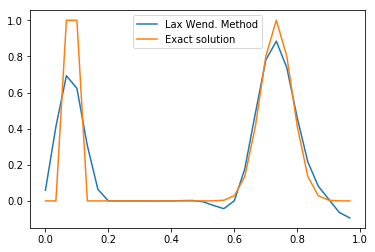

In [2]:
def LW(u0, a, xmin, xmax, t_final, nt) :
    """
    Solve the advection equation with periodic
    boundary conditions on the interval [xmin, xmax]
    using the upwind finite volume scheme.
    Use u0 as the initial conditions.
    a is the constant from the PDE.
    Use the size of u0 as the number of nodes in
    the spatial dimension.
    Let nt be the number of spaces in the time dimension
    (this is the same as the number of steps if you do
    not include the initial state).
    Plot and show the computed solution along
    with the exact solution. """
    dt = float(t_final) / nt
    # Since we are doing periodic boundary conditions,
    # we need to divide by u0.size instead of (u0.size - 1).
    dx = float(xmax - xmin) / u0.size
    lambda_ = a * dt / dx
    u = u0.copy()
    for j in range(nt):
        # The Upwind method. The np.roll function helps us
        # account for the periodic boundary conditions.
        m_min = (u - np.roll(u, 1)) / dx
        m_plus = (np.roll(u, -1) - u) / dx
        F_min = np.roll(u, 1) + (m_min / 2) * (dx - (a * dt))
        F_plus = u + (m_plus / 2) * (dx - (a * dt))
        u -= lambda_ * (F_plus - F_min)
    # Get the x values for the plots.
    x = np.linspace(xmin, xmax, u0.size+1)[:-1]
    # Plot the computed solution.
    plt.plot(x, u, label='Lax Wend. Method')
    # Find the exact solution and plot it.
    distance = a * t_final
    roll = int((distance - floor(distance)) * u0.size)
    plt.plot(x, np.roll(u0, roll), label='Exact solution')
    # Show the plot with the legend.
    plt.legend(loc='best')
    plt.show()


nx = 30
nt = nx * 3 // 2
x = np.linspace(0., 1., nx+1)[:-1]
u0 = np.exp(-(x - .3)**2 / .005)
arr=(.6<x) & (x<.7)
u0[arr] += 1.
# Run the simulation.
LW(u0, 1.2, 0, 1, 1.2, nt)

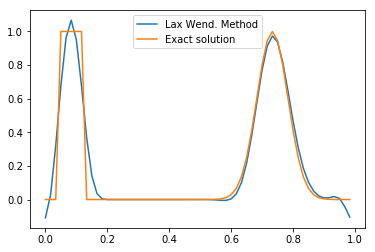

In [3]:
nx = 60
nt = nx * 3 // 2
x = np.linspace(0., 1., nx+1)[:-1]
u0 = np.exp(-(x - .3)**2 / .005)
arr=(.6<x) & (x<.7)
u0[arr] += 1.
# Run the simulation.
LW(u0, 1.2, 0, 1, 1.2, nt)

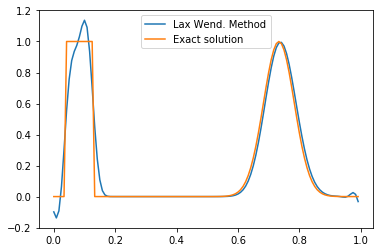

In [4]:
nx = 120
nt = nx * 3 // 2
x = np.linspace(0., 1., nx+1)[:-1]
u0 = np.exp(-(x - .3)**2 / .005)
arr=(.6<x) & (x<.7)
u0[arr] += 1.
# Run the simulation.
LW(u0, 1.2, 0, 1, 1.2, nt)

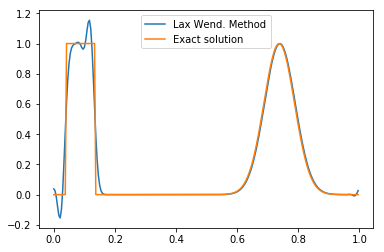

In [5]:
nx = 240
nt = nx * 3 // 2
x = np.linspace(0., 1., nx+1)[:-1]
u0 = np.exp(-(x - .3)**2 / .005)
arr=(.6<x) & (x<.7)
u0[arr] += 1.
# Run the simulation.
LW(u0, 1.2, 0, 1, 1.2, nt)

### Problem 2

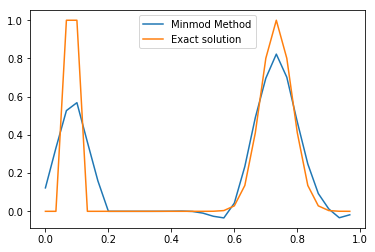

In [6]:
def minmod(a,b) :
    return_value = np.zeros_like(a)
    for i in range(len(return_value)) :
        if a[i]*b[i] > 0 :
            if np.abs(a[i]) > np.abs(b[i]) :
                return_value[i] = b[i]
            else :
                return_value[i] = a[i]
    return return_value

def minmod_method(u0, a, xmin, xmax, t_final, nt) :
    """
    Solve the advection equation with periodic
    boundary conditions on the interval [xmin, xmax]
    using the upwind finite volume scheme.
    Use u0 as the initial conditions.
    a is the constant from the PDE.
    Use the size of u0 as the number of nodes in
    the spatial dimension.
    Let nt be the number of spaces in the time dimension
    (this is the same as the number of steps if you do
    not include the initial state).
    Plot and show the computed solution along
    with the exact solution. """
    dt = float(t_final) / nt
    # Since we are doing periodic boundary conditions,
    # we need to divide by u0.size instead of (u0.size - 1).
    dx = float(xmax - xmin) / u0.size
    lambda_ = a * dt / dx
    u = u0.copy()
    for j in range(nt):
        # The Upwind method. The np.roll function helps us
        # account for the periodic boundary conditions.
        m_min = (u - np.roll(u, 1)) / dx
        m_plus = (np.roll(u, -1) - u) / dx
        real_m_min = minmod(m_min,m_plus)
        m_extra = (np.roll(u, -2) - np.roll(u, -1)) / dx
        real_m_plus = minmod(m_plus,m_extra)
        F_min = np.roll(u, 1) + (real_m_min / 2) * (dx - (a * dt))
        F_plus = u + (real_m_plus / 2) * (dx - (a * dt))
        u -= lambda_ * (F_plus - F_min)
    # Get the x values for the plots.
    x = np.linspace(xmin, xmax, u0.size+1)[:-1]
    # Plot the computed solution.
    plt.plot(x, u, label='Minmod Method')
    # Find the exact solution and plot it.
    distance = a * t_final
    roll = int((distance - floor(distance)) * u0.size)
    plt.plot(x, np.roll(u0, roll), label='Exact solution')
    # Show the plot with the legend.
    plt.legend(loc='best')
    plt.show()


nx = 30
nt = nx * 3 // 2
x = np.linspace(0., 1., nx+1)[:-1]
u0 = np.exp(-(x - .3)**2 / .005)
arr=(.6<x) & (x<.7)
u0[arr] += 1.
# Run the simulation.
minmod_method(u0, 1.2, 0, 1, 1.2, nt)

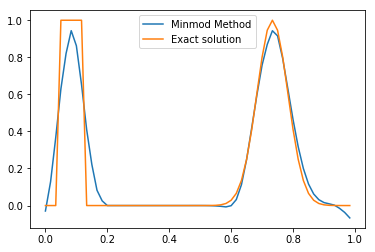

In [7]:
nx = 60
nt = nx * 3 // 2
x = np.linspace(0., 1., nx+1)[:-1]
u0 = np.exp(-(x - .3)**2 / .005)
arr=(.6<x) & (x<.7)
u0[arr] += 1.
# Run the simulation.
minmod_method(u0, 1.2, 0, 1, 1.2, nt)

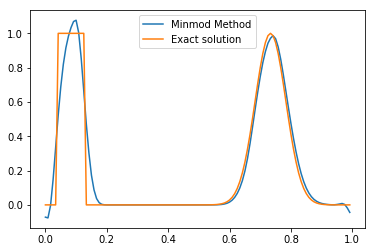

In [8]:
nx = 120
nt = nx * 3 // 2
x = np.linspace(0., 1., nx+1)[:-1]
u0 = np.exp(-(x - .3)**2 / .005)
arr=(.6<x) & (x<.7)
u0[arr] += 1.
# Run the simulation.
minmod_method(u0, 1.2, 0, 1, 1.2, nt)

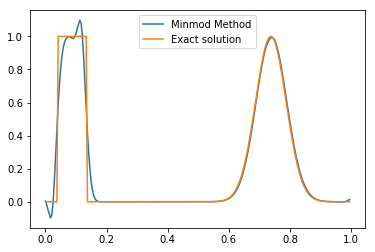

In [9]:
nx = 240
nt = nx * 3 // 2
x = np.linspace(0., 1., nx+1)[:-1]
u0 = np.exp(-(x - .3)**2 / .005)
arr=(.6<x) & (x<.7)
u0[arr] += 1.
# Run the simulation.
minmod_method(u0, 1.2, 0, 1, 1.2, nt)